# Downloading and Processing NEX-GDDP-CMIP6

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

This is a guide to downloading and processing NEX-GDDP-CMIP6 Data

[NEX-GDDP-CMIP6 Website](https://www.nccs.nasa.gov/services/data-collections/land-based-products/nex-gddp-cmip6)

## Table of Contents

1. [Creating Directories and Downloading Files](#Creating-Directories-and-Downloading-Files)
2. [Currently Available Datasets](#Currently-Available-Datasets)
    1. [Downloaded](#Downloaded)
    2. [Available Through Google Earth Engine](#Available-Through-Google-Earth-Engine)
3. [Processing Data](#Processing-Data)
    1. [historical, ssp245, and ssp585](#historical,-ssp245,-and-ssp585)
    2. [ssp370](#ssp370)
4. [Working with the Data](#Working-with-the-Data)

## Creating Directories and Downloading Files

The file `nex_gddp_cmip6_download_il.py` both creates directories and downloads files.

You will need os, pandas, s3fs, xarray, matplotlib, cartopy, and io to run this file. os and io come automatically with Python 3 but pandas, s3fs, xarray, matplotlib, and cartopy will need to be installed separately.

You can edit the file using `vim nex_gddp_cmip6_download_il.py` in order to change the specifications.

- To change the directory where the subdirectories are created and files are downloaded, change the directory in `os.chdir()`.

- Change the variable `models` to change which models you want to download for. It is already set to all available NEX-GDDP-CMIP6 models.

- Change `variables` to the variables you want to download.

- Change `scenarios` to the scenarios you want to download. 

You can then run the code using `python nex_gddp_cmip6_download_il.py`.

The file directory will look like so:

### NEX-GDDP-CMIP6
- ACCESS-CM2
    - historical
        - r1i1p1f1
            - pr
            - tas
            - tasmax
            - tasmin
            - sfcWind
    - ssp126
    - ssp245
    - ssp370
    - ssp585
- ACCESS-ESM1-5
    - historical
    - ssp126....
- BCC-CSM2-MR.....

depending on which files you choose to download. Each dataset downloaded encompasses a year over Illinois and surrounding areas.

# Currently Available Datasets


## Downloaded
Currently, we have daily data downloaded for:


| Variable | Models | Scenarios |
| :---: | :---: | :---: |
| pr |  Batch 1 | historical, ssp126, ssp245, ssp370, ssp585 |
| tas | Batch 1 | historical, ssp126, ssp245, ssp370, ssp585 |
| tasmax | Batch 1 | historical, ssp126, ssp245, ssp370, ssp585 |
| tasmin | Batch 1 | historical, ssp126, ssp245, ssp370, ssp585 |
| sfcWind | Batch 2 | ssp370 |
| huss | Batch 2 | ssp370 |

- historical: 1950-2014
- ssp126: 2015-2100
- ssp245: 2015-2100
- ssp370: 2015-2100
- ssp585: 2015-2100


Signifiers in models:

- Batch 1: CNRM-ESM2-1, EC-Earth3-Veg-LR, IPSL-CM6A-LR, MIROC6, MPI-ESM1-2-HR, MPI-ESM1-2-LR, NorESM2-LM, UKESM1-0-LL
- Batch 2: ACCESS-CM2, ACCESS-ESM1-5, BCC-CSM2-MR, CESM2, CMCC-CM2-SR5, CMCC-ESM2, CNRM-CM6-1, CNRM-ESM2-1, CanESM5, EC-Earth3, EC-Earth3-Veg-LR, FGOALS-g3, GFDL-ESM4, GISS-E2-1-G, IITM-ESM, INM-CM4-8, INM-CM5-0, IPSL-CM6A-LR, KACE-1-0-G, MIROC-ES2L, MIROC6, MPI-ESM1-2-HR, MPI-ESM1-2-LR, MRI-ESM2-0, NorESM2-LM, NorESM2-MM, TaiESM1, UKESM1-0-LL

Data is downloaded in ` /data/keeling/a/cristi/a/downscaled_data/cmip6/nex_gddp/ncs/IL_NEX-GDDP-CMIP6 `

Typical path structure is 

```
[model]/[scenario]/[experiment_id]/[variable]/[variable]_day_[model]_[scenario}_[experiment_id]_gn_[year]_illinois.nc 

```

although the file name structure may be different for certain files.

Example:

```
/data/keeling/a/cristi/a/downscaled_data/cmip6/nex_gddp/ncs/IL_NEX-GDDP-CMIP6/CNRM-ESM2-1/ssp245/r1i1p1f2/tasmax/tasmax_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_2085_illinois.nc
```

Available models are in the [README.md](../README.md). There is one experiment ID used for each model.

## Available Through Google Earth Engine

Alternatively, NEX-GDDP-CMIP6 can be accessed using Google Earth Engine (GEE). 

[This website](https://developers.google.com/earth-engine/datasets/catalog/NASA_GDDP-CMIP6) has information on all variables and models available. 

For our purposes, GEE is how we access huss and sfcWind data.

Below, we will go over accessing GEE data and processing it.

## Processing Data

Data processing is done through the use of the script ` NEX_GDDP_CMIP6_processor.py `.

You will need [ee](https://developers.google.com/earth-engine/guides/python_install) (GEE's package), pandas, [xee](https://github.com/google/Xee), xarray, glob, and argparse to run this file.

This file processes NEX-GDDP-CMIP6 data into a NetCDF file. It specifically focuses in on Illinois and surrounding areas. 

Inputs:

- `scenario` (str) - The scenario you want.
    - "historical" - Pulled from GEE
    - "ssp245" - Pulled from GEE
    - "ssp370" - From downloaded datasets
    - "ssp585" - Pulled from GEE
- `variable` (str) - The variable you want. The full list of available variables is [here](https://developers.google.com/earth-engine/datasets/catalog/NASA_GDDP-CMIP6#bands), but for our purposes we will most likely be using "huss" (Near-surface specific humidity) and "sfcWind" (Daily-mean near-surface wind speed).
- `year_start` (int) - The first year you want to request
- `year_end` (int) - The last year you want to request (inclusive)
- `out_path` (str) - Directory you'd like to save the dataset in

Example code:

```
python NEX_GDDP_CMIP6_processor.py --scenario="ssp245" --variable="sfcWind" --year_start=2024 --year_end=2034 --out_path="."
```
results in a file in your current directory called ` ./NEX-GDDP-CMIP6_IL_sfcWind_ssp245_2024-2034.nc `


# Working with the Data

Let's try loading `NEX-GDDP-CMIP6_IL_sfcWind_ssp245_2024-2034.nc`!

In [2]:
sfcWind_data = xr.open_dataset('./NEX-GDDP-CMIP6_IL_sfcWind_ssp245_2024-2034.nc')
sfcWind_data.load()

<xarray.Dataset>
Dimensions:  (model: 33, time: 4017, lon: 27, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 2024-01-02 ... 2034-12-30
  * lon      (lon) float64 267.3 267.6 267.8 268.1 ... 273.1 273.3 273.6 273.8
  * lat      (lat) float64 43.43 43.18 42.93 42.68 ... 36.93 36.68 36.43 36.18
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    sfcWind  (model, time, lon, lat) float32 3.628 3.593 3.596 ... 2.044 1.993
Attributes:
    crs:      EPSG:4326

This dataset has 4 dimensions.

- `lon` - Longitude. To cover Illinois, it extends from 267.3 to 273.8 lon with a resolution of 25 km.
- `lat` - Latitude. This extends from 36.18 to 43.43 lat with a resolution of 25 km also.
- `time` - This covers the date range we gave it (2024-01-01 to 2034-12-30) and has a daily resolution.
- `name` - This dimension has all the models

Let's look at a multi-model mean at the time 2027-12-10.

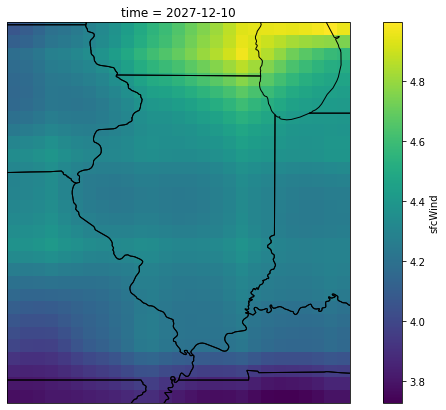

In [3]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
sfcWind_data.sfcWind.sel(time='2027-12-10').mean('model').plot.pcolormesh(x='lon',y='lat')
ax.add_feature(cfeature.STATES)